In [94]:
import pyspark
from pyspark.sql import *
from pyspark import SparkContext, SparkConf

from pyspark.sql import *
from pyspark.sql.functions import *

import pandas as pd
import sqlite3

import matplotlib

In [95]:
conf = SparkConf().setAppName("appName").setMaster("local")
sc = SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

25/02/16 15:37:19 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
25/02/16 15:37:19 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [96]:
import os.path
from os import listdir
from os.path import isfile, join
import sys

import subprocess
import yaml

# Add the parent directory to the system path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

print(parent_dir)

/home/ho-yu


In [97]:


print("Current working directory set to:", os.getcwd())

# Read the config.yaml file
# if os.path.exists('config.yaml'):
#     with open('config.yaml', 'r') as file:
#         config = yaml.safe_load(file)

if os.path.exists('../config.yaml'):
    with open('../config.yaml', 'r') as file:
        config = yaml.safe_load(file)

dir = config['fileio']['working_directory2']

print("dir: " + dir)

# Set the current working directory
os.chdir(dir)
print("Current working directory set to:", os.getcwd())

Current working directory set to: /home/ho-yu/bsg
dir: /home/ho-yu/bsg
Current working directory set to: /home/ho-yu/bsg


In [98]:
sql_definitions = [
	"people.sql", 
	"cylons.sql", 
	"cylons_people.sql",
	"colonies.sql", 
	"person_actions.sql",
	"employees.sql",
	"employers.sql",
	"departments.sql"
]

sql_content = ""

for filename in sql_definitions:
	filename = dir + "/sql/definitions/" + filename
	if not os.path.isfile(filename):
		print('File does not exist: ' + filename)
	else:
	    with open(filename) as f:
	        sql_content = sql_content + f.read()

f = open(dir + "/sql/generated/simple.sql", "w")
f.write(sql_content)
f.close()

db_command_file = dir + "/generate_db.sh"
db_command = "sqlite3 " + dir + "/db/simple.db < " + dir + "/sql/generated/simple.sql"

with open(db_command_file, "w") as file:
    file.write(db_command)

try:
    result = subprocess.run(["bash", db_command_file], check=True, text=True, capture_output=True)
    print("db construct successful:", result.stdout)
except subprocess.CalledProcessError as e:
    print("db construct error:", e)


db construct error: Command '['bash', '/home/ho-yu/bsg/generate_db.sh']' returned non-zero exit status 1.


In [99]:

conn = sqlite3.connect(dir + "/db/simple.db")
cursor = conn.cursor()

In [100]:
rows = cursor.execute("SELECT * FROM person_actions")
print(rows.fetchall())

[]


In [101]:

if (sys.modules.get('src.utils') is not None): 
    del sys.modules['src.utils']

from src.utils import MyUtils as utils

sql = utils.generate_actions_sql()

for i in sql:
    print(i)
    cursor.execute(i)
    conn.commit()

with open(dir + "/sql/testdata/test_generated_data.sql", "r") as file:
    test_data = file.read()
    cursor.executescript(test_data)
    conn.commit()


INSERT INTO person_actions (id, action_name, source_person_id, target_person_id) VALUES (NULL, 'help', 3, 1);
INSERT INTO person_actions (id, action_name, source_person_id, target_person_id) VALUES (NULL, 'save', 5, 7);
INSERT INTO person_actions (id, action_name, source_person_id, target_person_id) VALUES (NULL, 'help', 4, 6);
INSERT INTO person_actions (id, action_name, source_person_id, target_person_id) VALUES (NULL, 'save', 5, 7);
INSERT INTO person_actions (id, action_name, source_person_id, target_person_id) VALUES (NULL, 'betray', 4, 9);
INSERT INTO person_actions (id, action_name, source_person_id, target_person_id) VALUES (NULL, 'betray', 7, 6);
INSERT INTO person_actions (id, action_name, source_person_id, target_person_id) VALUES (NULL, 'fight', 2, 6);
INSERT INTO person_actions (id, action_name, source_person_id, target_person_id) VALUES (NULL, 'betray', 9, 9);
INSERT INTO person_actions (id, action_name, source_person_id, target_person_id) VALUES (NULL, 'help', 10, 7);
IN

In [102]:

df_people = pd.read_sql_query("SELECT * FROM people", conn, dtype={"home_colony_id": "Int64"})
df_colonies = pd.read_sql_query("SELECT * FROM colonies", conn)
df_cylons = pd.read_sql_query("SELECT * FROM cylons", conn, dtype={"model_number": "Int64"})
df_cylons_people = pd.read_sql_query("SELECT * FROM cylons_people", conn)
df_person_actions = pd.read_sql_query("SELECT * FROM person_actions", conn)
df_employees = pd.read_sql_query("SELECT * FROM employees", conn)
df_employers = pd.read_sql_query("SELECT * FROM employers", conn)
df_departments = pd.read_sql_query("SELECT * FROM departments", conn)


print("type: ")
print(df_people["home_colony_id"].dtype)

print("df_people")
print(df_people.head())
print()


df_people.to_csv(dir  + "/csv/people.csv", index=False)
df_cylons.to_csv(dir  + "/csv/cylons.csv", index=False)
df_cylons_people.to_csv(dir  + "/csv/cylons_people.csv", index=False)
df_colonies.to_csv(dir  + "/csv/colonies.csv", index=False)
df_person_actions.to_csv(dir  + "/csv/person_actions.csv", index=False)
df_employees.to_csv(dir  + "/csv/employees.csv", index=False)
df_employers.to_csv(dir  + "/csv/employers.csv", index=False)
df_departments.to_csv(dir  + "/csv/departments.csv", index=False)


type: 
Int64
df_people
   id first_name last_name salutation call_sign         dob  weight_lbs  \
0   1        Lee     Adama        Sir    Apollo  3730-03-25         155   
1   2    William     Adama        Sir    Husker  3700-01-15         200   
2   3       Kara    Thrace        Sir  Starbuck  3735-11-26         120   
3   4      Gaius    Baltar        Dr.      None  3715-07-05         160   
4   5      Laura    Roslin        Ms.      None  3705-03-01         115   

   height_m gender  dna_mutations_n  home_colony_id  
0      1.78      M             1556               4  
1      1.74      M          5454544               4  
2      1.60      F            25444               4  
3      1.70      M             3566               1  
4      1.55      F        534354354               4  



In [103]:

rdd_people = sc.parallelize(df_people.values.tolist())
rdd_people.collect()

[[1, 'Lee', 'Adama', 'Sir', 'Apollo', '3730-03-25', 155, 1.78, 'M', 1556, 4],
 [2,
  'William',
  'Adama',
  'Sir',
  'Husker',
  '3700-01-15',
  200,
  1.74,
  'M',
  5454544,
  4],
 [3,
  'Kara',
  'Thrace',
  'Sir',
  'Starbuck',
  '3735-11-26',
  120,
  1.6,
  'F',
  25444,
  4],
 [4, 'Gaius', 'Baltar', 'Dr.', None, '3715-07-05', 160, 1.7, 'M', 3566, 1],
 [5,
  'Laura',
  'Roslin',
  'Ms.',
  None,
  '3705-03-01',
  115,
  1.55,
  'F',
  534354354,
  4],
 [6, 'Leoben', 'Conoy', 'Mr.', None, '3715-03-06', 155, 1.7, 'M', 150, <NA>],
 [7,
  'Sharon',
  'Valerii',
  'Sir',
  'Boomer',
  '3735-08-13',
  116,
  1.56,
  'F',
  188,
  <NA>],
 [8,
  'Sharon',
  'Agathon',
  'Sir',
  'Athena',
  '3735-09-20',
  116,
  1.56,
  'F',
  90,
  <NA>],
 [9, 'Saul', 'Tigh', 'Sir', None, '3690-08-19', 170, 1.7, 'M', 7756664, 13],
 [10, 'Aaron', 'Doral', 'Mr.', None, '3720-12-14', 160, 1.8, 'M', 35, <NA>],
 [11, 'Billy', 'Keikeya', 'Mr.', None, '3727-11-15', 158, 1.75, 'M', 4415, 8],
 [12, 'Galen', 'T

In [104]:
bsg_people = spark.read.csv(dir + "/csv/people.csv", header=True, inferSchema=True).withColumnRenamed("id", "person_id")
bsg_colonies = spark.read.csv(dir + "/csv/colonies.csv", header=True).withColumnRenamed("id", "colony_id").withColumnRenamed("name", "colony_name");
bsg_actions = spark.read.csv(dir + "/csv/person_actions.csv", header=True)

bsg_data = bsg_people.join(bsg_colonies, bsg_people.home_colony_id == bsg_colonies.colony_id).join(bsg_actions, bsg_people.person_id == bsg_actions.source_person_id)
bsg_data.createOrReplaceTempView("bsg_data")
bsg_data_count = spark.sql("SELECT colony_name, COUNT(DISTINCT(person_id)) personCount FROM bsg_data GROUP BY colony_name")
bsg_data_count.show()


+-----------+-----------+
|colony_name|personCount|
+-----------+-----------+
|    Aerilon|          1|
|      Earth|          1|
|    Caprica|          4|
+-----------+-----------+



In [105]:
pd_bsg = bsg_data_count.toPandas()
pd_bsg.head()

,colony_name,personCount
0,Aerilon,1
1,Earth,1
2,Caprica,4


Text(0.5, 0, 'Number of People')

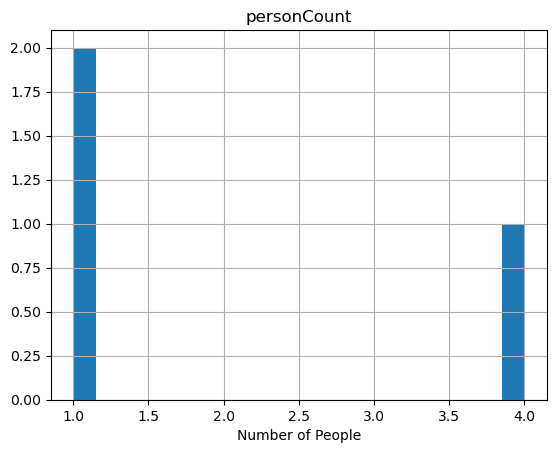

In [106]:
pd_bsg.hist(column="personCount", bins=20)
matplotlib.pyplot.xlabel("Number of People")

In [107]:
colony_counts = bsg_data.groupBy("home_colony_id").count().sort(desc("count"))

colony_counts.show()

+--------------+-----+
|home_colony_id|count|
+--------------+-----+
|             4|   43|
|             1|    8|
|            13|    7|
+--------------+-----+



In [108]:
conn.close()
sc.stop()